In [1]:
from keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
model = load_model('vitalDB01.h5')

In [3]:
new_data = pd.read_csv('ecg_all_cropped_time_paciente_5.csv')

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))  

training_data = pd.read_csv('./ecg_all_cropped_time.csv', usecols=[0], engine='python')
scaler.fit(training_data)

new_data_scaled = scaler.transform(new_data[['ecg']]).flatten()

time_steps = 100  # Certifique-se de usar o mesmo número de time steps que no treinamento
horizon = 10  # Certifique-se de usar o mesmo horizonte de predição que no treinamento

new_df_features = pd.DataFrame()
for i in range(time_steps):
    new_df_features[f't-{time_steps-i-1}'] = new_data_scaled[i:len(new_data_scaled)-horizon-time_steps+i+1]

new_df_labels = pd.DataFrame()
for i in range(1, horizon+1):
    new_df_labels[f't+{i}'] = new_data_scaled[time_steps+i-1:len(new_data_scaled)-horizon+i]

new_df = pd.concat([new_df_features, new_df_labels], axis=1)

new_dataX = np.array(new_df_features)
new_datay = np.array(new_df_labels)

new_predictions = model.predict(new_dataX)

new_predictions = scaler.inverse_transform(new_predictions)

935/935 [==============================] - 1s 1ms/step


In [29]:
def plot_results(new_predictions, original_data, time_steps, horizon):
    num_subplots = horizon + 1  # Um subplot adicional para as previsões dos novos dados
    subplot_positions = [i + 1 for i in range(num_subplots)]

    plt.figure(figsize=(15, 3 * num_subplots), dpi=100)

    plt.subplot(num_subplots + 1, 1, 1)  # Adicionado +1 aqui para incluir os dados originais
    plt.plot(range(len(original_data)), original_data, label='Original Data', color='blue')
    plt.legend(['Original Data'])
    plt.ylabel('Original Values')
    plt.title('Original Data')

    for i in range(horizon):
        plt.subplot(num_subplots + 1, 1, subplot_positions[i] + 1)  # Adicionado +1 aqui
        plt.plot(range(len(new_predictions)), new_predictions[:, i], linestyle='dashed', color='orange')
        plt.plot(range(len(original_data)), original_data, label='Original Data')  # Adicionado aqui
        plt.legend([f'New Prediction t+{i + 1}', 'Original Data'])  # Atualizado aqui
        plt.ylabel(f'Predicted Values t+{i + 1}')
        plt.title(f'New Data Prediction t+{i + 1}')

    plt.tight_layout()
    plt.xlabel('Time steps')
    plt.show()

In [21]:
original_data = pd.read_csv('./ecg_all_cropped_time_paciente_5.csv', usecols=[0], engine='python').values.flatten()

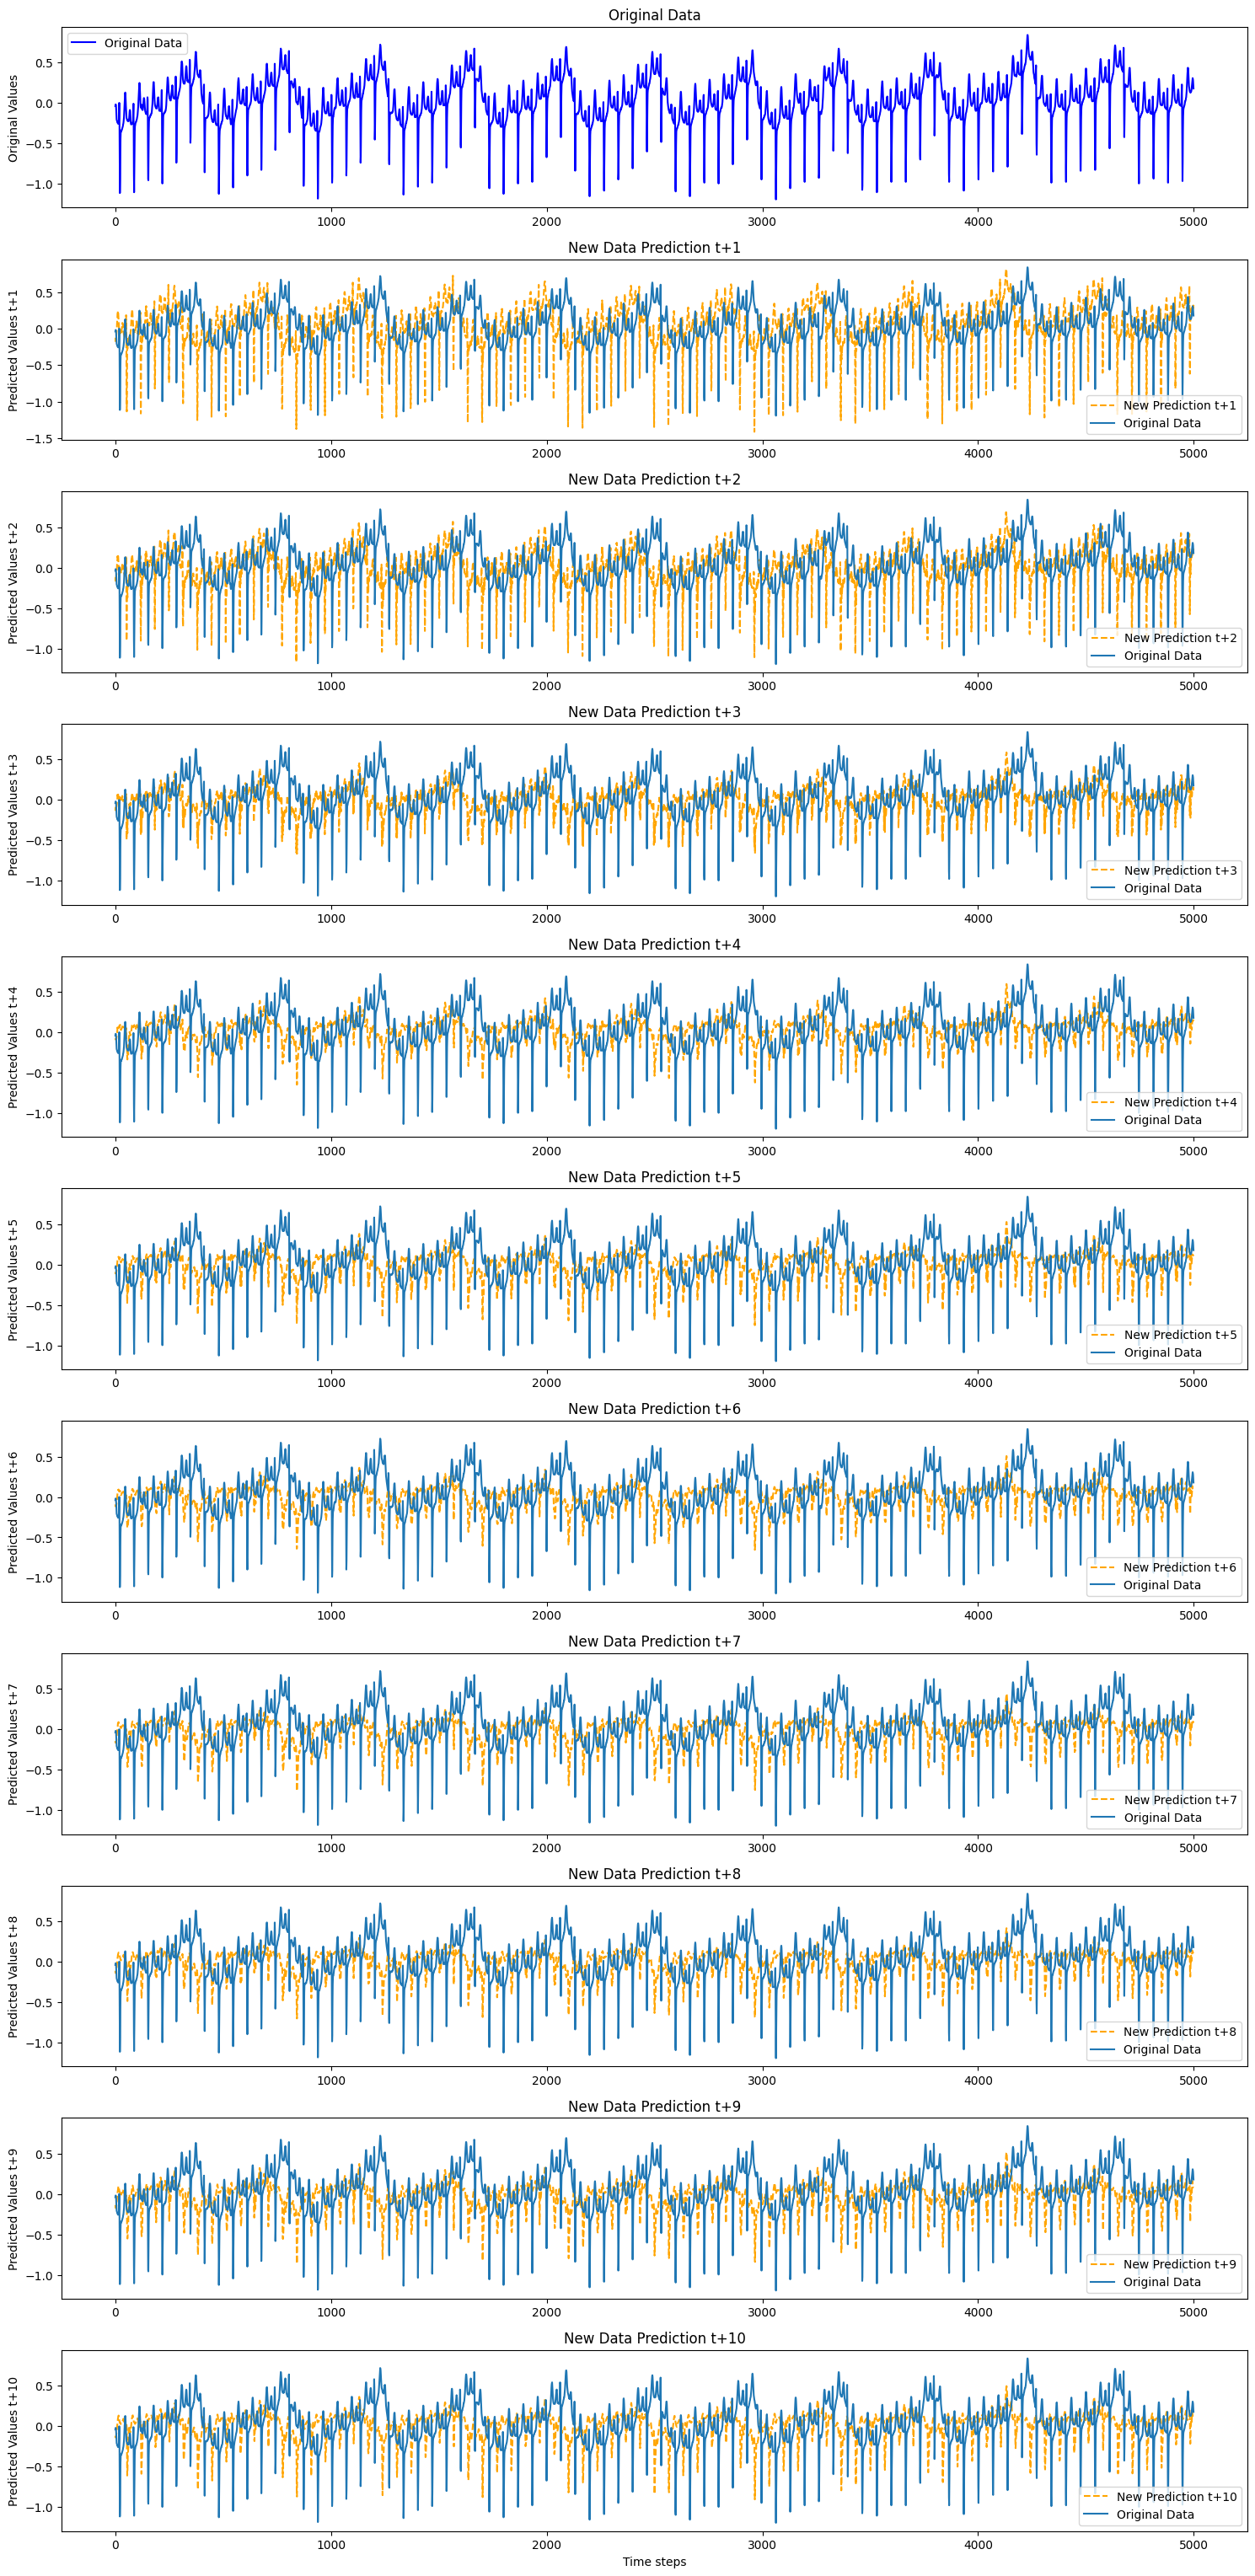

In [31]:
plot_results(new_predictions[:5000], original_data[:5000], time_steps, horizon)

In [12]:
def print_error_new_predictions(new_predictions, horizon):
    for i in range(horizon):
        y_pred = new_predictions[:, i]
        print(f't+{i+1} RMSE: {calculate_rmse(y_pred)} RMSE')

In [13]:
def calculate_rmse(predictions):
    return np.sqrt(np.mean(np.square(predictions)))

In [14]:
print_error_new_predictions(new_predictions, horizon)

t+1 RMSE: 0.2985181510448456 RMSE
t+2 RMSE: 0.2350131869316101 RMSE
t+3 RMSE: 0.17220814526081085 RMSE
t+4 RMSE: 0.1666228324174881 RMSE
t+5 RMSE: 0.16468596458435059 RMSE
t+6 RMSE: 0.15847942233085632 RMSE
t+7 RMSE: 0.16369251906871796 RMSE
t+8 RMSE: 0.15311799943447113 RMSE
t+9 RMSE: 0.17888431251049042 RMSE
t+10 RMSE: 0.17381350696086884 RMSE
